In [20]:
import numpy as np
import pandas as pd 
import csv 
from matplotlib import pyplot as plt
from matplotlib import style 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
from scipy.stats.stats import pearsonr


In [21]:
Teams = pd.read_csv("Master Premier league Dataset.csv", encoding = "ISO-8859-1")  
Teams.head()

Season   Match_id        Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  \
0  2002/2003         1  17/08/2002  Blackburn  Sunderland     0     0   D   
1  2002/2003         2  17/08/2002   Charlton     Chelsea     2     3   A   
2  2002/2003         3  17/08/2002    Everton   Tottenham     2     2   D   
3  2002/2003         4  17/08/2002     Fulham      Bolton     4     1   H   
4  2002/2003         5  17/08/2002      Leeds    Man City     3     0   H   

   HTHG  HTAG     ...      Unnamed: 40 Unnamed: 41  Unnamed: 42  Unnamed: 43  \
0     0     0     ...              NaN         NaN          NaN          NaN   
1     2     1     ...              NaN         NaN          NaN          NaN   
2     1     0     ...              NaN         NaN          NaN          NaN   
3     3     1     ...              NaN         NaN          NaN          NaN   
4     2     0     ...              NaN         NaN          NaN          NaN   

   Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  Unnamed: 48  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 49  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 50 columns]

In [22]:
Teams['HomeResult'] = np.where(Teams['FTHG'] > Teams['FTAG'],'W',
                                (np.where(Teams['FTHG'] == Teams['FTAG'],'D','L' )))

Teams['AwayResult'] = np.where(Teams['FTAG'] > Teams['FTHG'],'W',
                                (np.where(Teams['FTAG'] == Teams['FTHG'],'D','L' )))

#Teams.head()

In [23]:
Home_Team = pd.DataFrame (data=Teams, columns=['Date','Season ','Match_id','HomeTeam','HTHG','FTHG','HS','HST','HC','HF','HY','HR','HomeResult'])
#Home_Team.head()

In [24]:
Home_Team.columns = ['Date','Season_id', 'match_id', 'team_name', 'half_goals', 'goals', 'shots', 'shots_on_target', 'corners','fouls','Yellow_cards','Red_Cards','Result']
#Home_Team.head()

In [25]:
Away_Team = pd.DataFrame (data=Teams, columns=['Date','Season ','Match_id','AwayTeam','HTAG','FTAG','AS','AST','AC','AF','AY','AR','AwayResult'])
Away_Team.columns = ['Date','Season_id','match_id', 'team_name', 'half_goals', 'goals', 'shots', 'shots_on_target', 'corners','fouls','Yellow_cards','Red_ards','Result' ]
#Away_Team.head()

In [26]:
#League = pd.merge(Home_Team, Away_Team,left_on='Match', right_on='Match')
#Matches = [Home_Team,Away_Team]
League = pd.concat([Home_Team,Away_Team],axis=0)
#League.sort(['Season_id', 'match_id'], ascending=[1, 0])
#League.columns 
#League.head()
#League.to_csv("Master 2P_league.csv")

In [27]:
Wins =League[League['Result']== 'W']
Wins = pd.DataFrame (data=Wins, columns=['Season_id','team_name','Result'])
Wins.columns = ['Season_id', 'team_name','Wins']
WinStats = Wins.groupby(['Season_id','team_name']).count()
WinStats= WinStats.reset_index()
#WinStats.head()
WinStats[WinStats['team_name'] == 'Arsenal']

Season_id team_name  Wins
0    2002/2003   Arsenal    23
20   2003/2004   Arsenal    26
40   2004/2005   Arsenal    25
60   2005/2006   Arsenal    20
80   2006/2007   Arsenal    19
100  2007/2008   Arsenal    24
120  2008/2009   Arsenal    20
140  2009/2010   Arsenal    23
160  2010/2011   Arsenal    19
180  2011/2012   Arsenal    21
200  2012/2013   Arsenal    21
220  2013/2014   Arsenal    24
240  2014/2015   Arsenal    22
260  2015/2016   Arsenal    20
280  2016/2017   Arsenal    14

In [28]:
AvgStats=League.groupby(['team_name','Season_id']).mean()
AvgStats=AvgStats.drop(['match_id'],axis=1)
AvgStats=AvgStats.reset_index()
AvgStats.tail()


team_name  Season_id  Red_Cards  Red_ards  Yellow_cards   corners  \
295     Wigan  2012/2013   0.000000  0.105263      1.736842  5.236842   
296    Wolves  2003/2004   0.052632  0.052632      1.736842  4.684211   
297    Wolves  2009/2010   0.052632  0.157895      1.684211  5.421053   
298    Wolves  2010/2011   0.000000  0.105263      1.657895  6.368421   
299    Wolves  2011/2012   0.157895  0.052632      1.684211  5.421053   

         fouls     goals  half_goals      shots  shots_on_target  
295  10.947368  1.236842    0.473684  11.894737         6.763158  
296  12.157895  1.000000    0.368421  10.473684         5.026316  
297  12.710526  0.842105    0.342105   9.921053         5.421053  
298  11.526316  1.210526    0.578947   9.763158         5.447368  
299   9.078947  1.052632    0.447368  10.815789         6.026316

In [29]:
#LeagueStats = pd.concat([AvgStats,WinStats],axis=0)
#LeagueStats 
#LeagueStats = pd.concat([AvgStats, WinStats])
LeagueStats = pd.merge(AvgStats, WinStats, on=['Season_id','team_name'])
#LeagueStats[LeagueStats['team_name']=='Arsenal'] #remove # to see the table 
LeagueStats.head()

team_name  Season_id  Red_Cards  Red_ards  Yellow_cards   corners  \
0   Arsenal  2002/2003   0.052632  0.105263      1.447368  7.000000   
1   Arsenal  2003/2004   0.052632  0.105263      1.368421  5.315789   
2   Arsenal  2004/2005   0.000000  0.052632      1.210526  5.342105   
3   Arsenal  2005/2006   0.000000  0.105263      1.447368  5.552632   
4   Arsenal  2006/2007   0.000000  0.157895      1.552632  7.315789   

       fouls     goals  half_goals      shots  shots_on_target  Wins  
0  12.710526  2.236842    1.184211  13.105263         7.789474    23  
1  13.131579  1.921053    0.973684  12.394737         7.184211    26  
2  11.684211  2.289474    1.000000  12.605263         7.868421    25  
3  12.605263  1.789474    0.947368  12.157895         7.210526    20  
4   9.684211  1.657895    0.578947  14.131579         7.263158    19

In [30]:
#LeagueStats[LeagueStats['team_name']=='Chelsea']

Data validation
Season    Team      Wins 
2015/2016 chelsea   18
2008/2009 chelsea   25
2004/2005 chelsea   29

# Data Visualisation

Correlation Coefficient 
[[ 1.          0.74348484]
 [ 0.74348484  1.        ]]


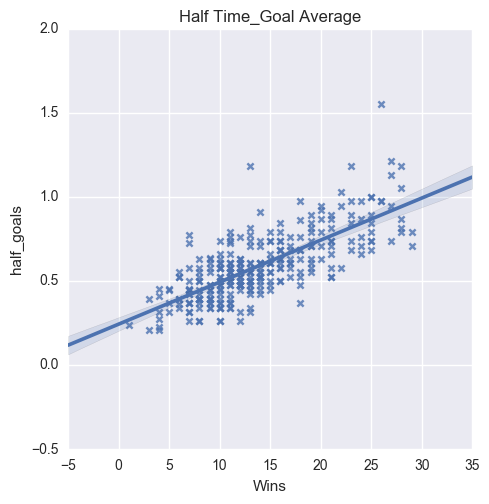

In [31]:
sns.lmplot(y='half_goals',x='Wins',data=LeagueStats, markers=["x"]);
sns.plt.title('Half Time_Goal Average');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.half_goals, LeagueStats.Wins))

Correlation Coefficient 
[[ 1.          0.82553302]
 [ 0.82553302  1.        ]]


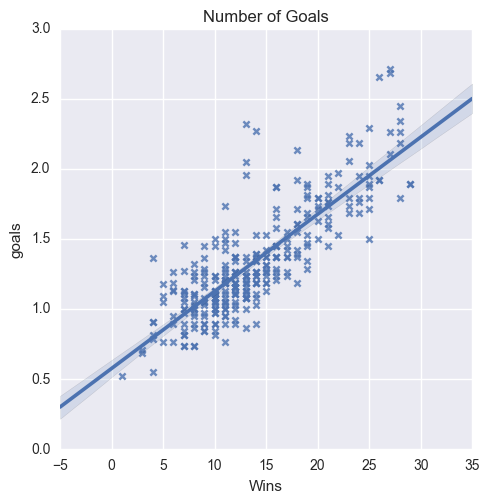

In [32]:
sns.lmplot(y='goals',x='Wins',data=LeagueStats, markers=["x"]);
sns.plt.title('Number of Goals');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.goals, LeagueStats.Wins))

Correlation Coefficient 
[[ 1.          0.65678967]
 [ 0.65678967  1.        ]]


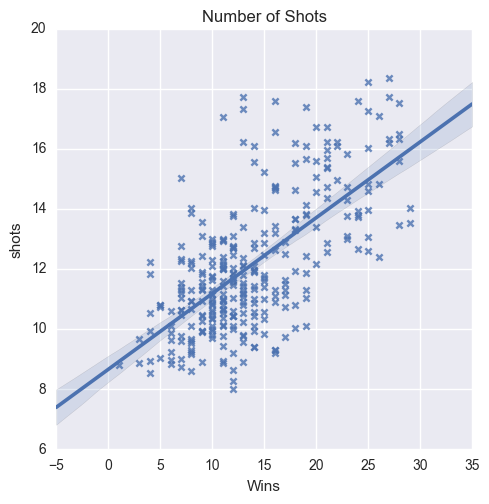

In [33]:
sns.lmplot(y='shots',x='Wins',data=LeagueStats, markers=["x"]);
sns.plt.title('Number of Shots');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.shots, LeagueStats.Wins))

Correlation Coefficient 
[[ 1.          0.61567305]
 [ 0.61567305  1.        ]]


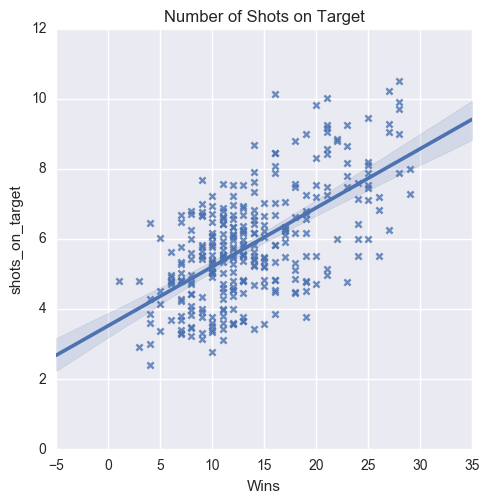

In [34]:
sns.lmplot(y='shots_on_target',x='Wins',data=LeagueStats,markers=["x"]);
sns.plt.title('Number of Shots on Target');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.shots_on_target, LeagueStats.Wins))

Correlation Coefficient 
[[ 1.          0.62287516]
 [ 0.62287516  1.        ]]


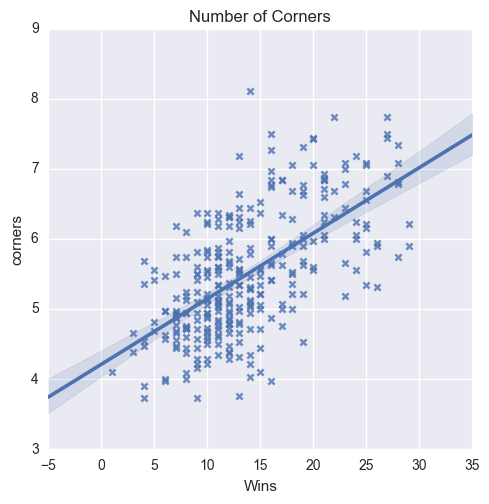

In [35]:
sns.lmplot(y='corners',x='Wins',data=LeagueStats,markers=["x"]);
sns.plt.title('Number of Corners');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.corners, LeagueStats.Wins))


Correlation Coefficient 
[[ 1.         -0.21440373]
 [-0.21440373  1.        ]]


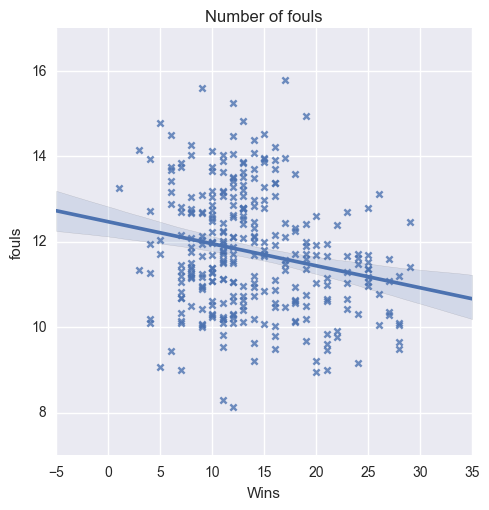

In [36]:
sns.lmplot(y='fouls',x='Wins',data=LeagueStats,markers=["x"]);
sns.plt.title('Number of fouls');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.fouls, LeagueStats.Wins))

Correlation Coefficient 
[[ 1.         -0.23179347]
 [-0.23179347  1.        ]]


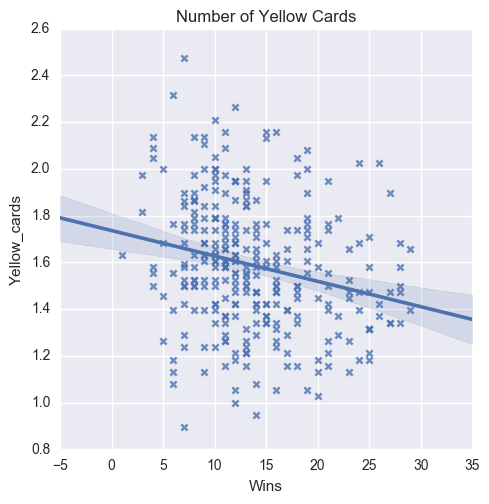

In [37]:
sns.lmplot(y='Yellow_cards',x='Wins',data=LeagueStats, markers=["x"]);
sns.plt.title('Number of Yellow Cards');
print (('Correlation Coefficient '))
print (np.corrcoef (LeagueStats.Yellow_cards, LeagueStats.Wins))


Correlation Coefficient 
[[ 1.         -0.12241358]
 [-0.12241358  1.        ]]


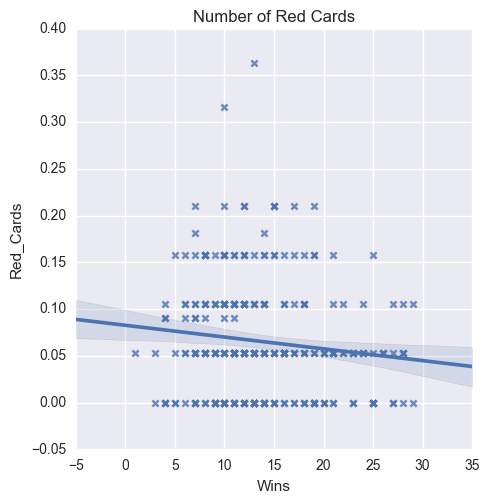

In [39]:
sns.lmplot(y='Red_Cards',x='Wins',data=LeagueStats,markers=["x"]);
sns.plt.title('Number of Red Cards');
print (('Correlation Coefficient '))
print ( np.corrcoef (LeagueStats.Red_Cards, LeagueStats.Wins))

Summary of the Graph: 

Higher average half Time goal = the more you win  

Higher average goals = the more you win  

Higher average shots = the more you win  

Higher average Shots on target = the more you win  

Higher average corners = the more you win 

Lower average fouls = the more you win

The above sections should be considered in the study on predicting the match out come because we can see a correlation from them on their increase and the increase in team wins.  

Number of red and yellow cards is showing no relation to the number of wins which the team has had.

